# Qualifed Resume Project 

- our goal in this project to help HR employees to find the best candidate in the job depending on the resume .

#### we will give him 2 options to choose best resume : 
- 1- search for general groups :  Management - Technology - Engineer - Other
- 2- Search for Specific department 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import scipy.stats as stats
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization

from sklearn.datasets import make_regression
from sklearn.pipeline import make_pipeline


from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression,RidgeCV

from sklearn.linear_model import LassoCV, RidgeCV,ElasticNetCV

from sklearn.model_selection import (cross_val_score, train_test_split, KFold, GridSearchCV)

import pandas as pd

import spacy
nlp = spacy.load('en_core_web_sm')

from spacy import displacy



import numpy as np
import pandas as pd
import re, nltk, spacy, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
import string


import nltk 
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud


/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


# load the data 

In [2]:


data = pd.read_csv("UpdatedResumeDataSet.csv")

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# EDA

In [3]:
print (data['Category'].unique())
print("")
print("Number of datapoints in each categories")
print(data['Category'].value_counts())

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']

Number of datapoints in each categories
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Data Science                 40
Operations Manager           40
Mechanical Engineer          40
ETL Developer                40
Sales                        40
Blockchain                   40
Arts                         36
Database                     33
PMO                          30
Health and fitness           30
Electrical Enginee

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
data 

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [5]:
data['Category'].unique()


/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='Category', ylabel='count'>

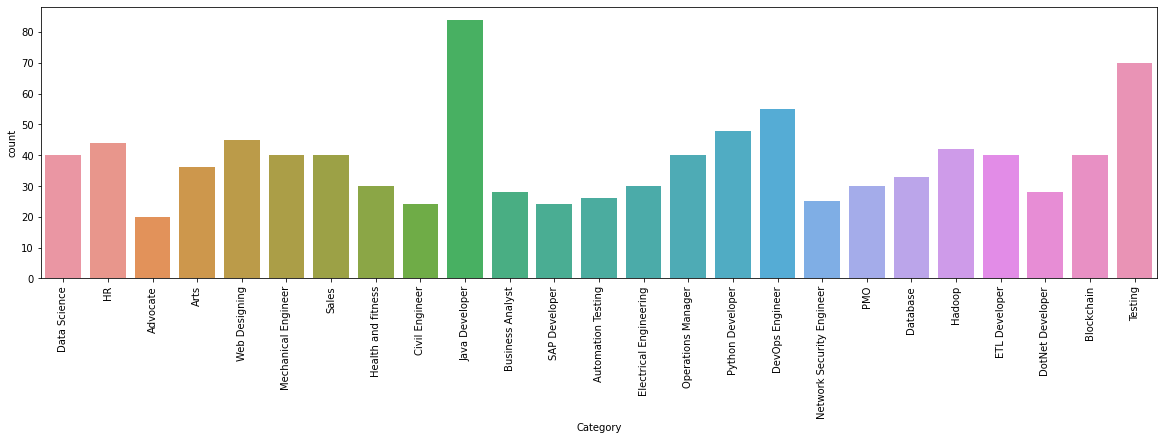

In [6]:
import seaborn as sns
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.countplot(x = "Category", data = data)

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


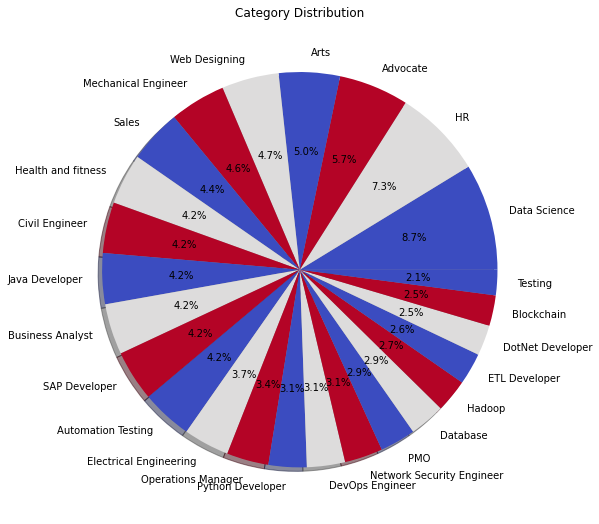

In [7]:
from matplotlib.gridspec import GridSpec
targetCounts = data['Category'].value_counts()
targetLabels = data['Category'].unique()

plt.figure(1, figsize=(20,20))
the_grid = GridSpec(2,2)

cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(the_grid[0,1], aspect = 1, title = 'Category Distribution')

sourcE_pir = plt.pie(targetCounts, labels = targetLabels, autopct = '%1.1f%%', shadow=True, colors = colors)
plt.show()

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

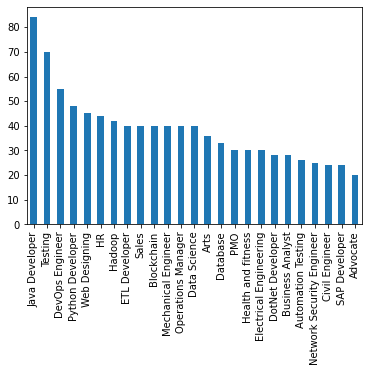

In [8]:
data['Category'].value_counts(sort=True).nlargest(25).plot.bar()

# Supervised

In [9]:

data.loc[data['Category'] == "Data Science", 'Category_N'] = 1
data.loc[data['Category'] == "HR", 'Category_N'] = 0
data.loc[data['Category'] == "Advocate", 'Category_N'] = 0
data.loc[data['Category'] == "Arts", 'Category_N'] = 3
data.loc[data['Category'] == "Mechanical Engineer", 'Category_N'] = 2
data.loc[data['Category'] == "Sales", 'Category_N'] = 3
data.loc[data['Category'] == "Health and fitness", 'Category_N'] = 3
data.loc[data['Category'] == "Civil Engineer", 'Category_N'] = 2
data.loc[data['Category'] == "Java Developer", 'Category_N'] = 1
data.loc[data['Category'] == "Business Analyst", 'Category_N'] = 0
data.loc[data['Category'] == "Web Designing", 'Category_N'] = 1
data.loc[data['Category'] == "SAP Developer", 'Category_N'] = 1
data.loc[data['Category'] == "Automation Testing", 'Category_N'] = 1
data.loc[data['Category'] == "Electrical Engineering", 'Category_N'] = 2
data.loc[data['Category'] == "Operations Manager", 'Category_N'] = 0
data.loc[data['Category'] == "Python Developer", 'Category_N'] = 1
data.loc[data['Category'] == "DevOps Engineer", 'Category_N'] = 1
data.loc[data['Category'] == "Network Security Engineer", 'Category_N'] = 1
data.loc[data['Category'] == "PMO", 'Category_N'] = 0
data.loc[data['Category'] == "Database", 'Category_N'] = 1
data.loc[data['Category'] == "Hadoop", 'Category_N'] = 1
data.loc[data['Category'] == "ETL Developer", 'Category_N'] = 1
data.loc[data['Category'] == "DotNet Developer", 'Category_N'] = 1
data.loc[data['Category'] == "Blockchain", 'Category_N'] = 1
data.loc[data['Category'] == "Testing", 'Category_N'] = 1


/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
data 

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Category,Resume,Category_N
0,Data Science,Skills * Programming Languages: Python (pandas...,1.0
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,1.0
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",1.0
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,1.0
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",1.0
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,1.0
958,Testing,â Willingness to accept the challenges. â ...,1.0
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",1.0
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,1.0


# 2- NLP

In [11]:

import re
import string
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

def clean_text(text):
    #convert text to lowercase
    text = text.lower() 
    #remove any numeric characters
    text = ''.join([word for word in text if not word.isdigit()]) 

#     text = [word for word in text if re.search("\d", word)== None]
    # remove URLs
    text = re.sub('http\S+\s*', ' ', text)  
    # remove RT and cc
    text = re.sub('RT|cc', ' ', text)
    # remove hashtags
    text = re.sub('#\S+', '', text)  
    # remove mentions
    text = re.sub('@\S+', '  ', text)  
    #punctuations removal
    text = "".join([word for word in text if word not in string.punctuation])
    text = re.sub("\W", " ", str(text))
    #stopwords removal
    ext = [word for word in text.split() if word not in stopwords]
    #replace consecutive non-ASCII characters with a space
    text = re.sub(r'[^\x00-\x7f]',r' ', text) 
    #extra whitespace removal
    text = re.sub('\s+', ' ', text)
    return text

data['Resume'] = data['Resume'].apply(lambda x: clean_text(x))


/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:15: DeprecationWarning: invalid escape sequence \S
<>:19: DeprecationWarning: invalid escape sequence \S
<>:21: DeprecationWarning: invalid escape sequence \S
<>:24: DeprecationWarning: invalid escape sequence \W
<>:30: DeprecationWarning: invalid escape sequence \s
<>:15: DeprecationWarning: invalid escape sequence \S
<>:19: DeprecationWarning: invalid escape sequence \S
<>:21: DeprecationWarning: invalid escape sequence \S
<>:24: DeprecationWarning: invalid escape sequence \W
<>:30: DeprecationWarning: invalid escape sequence \s
<ipython-input-11-17d30edc0234>:15: DeprecationWarning: invalid escape sequence \S
  te

In [12]:
data.Category.unique()

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [13]:
correx=data.copy()
correx

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Category,Resume,Category_N
0,Data Science,skills programming languages python pandas num...,1.0
1,Data Science,education details may to may be uitrgpv data s...,1.0
2,Data Science,areas of interest deep learning control system...,1.0
3,Data Science,skills r python sap hana tableau sap hana sql ...,1.0
4,Data Science,education details mca ymcaust faridabad haryan...,1.0
...,...,...,...
957,Testing,computer skills proficient in ms office word b...,1.0
958,Testing,willingness to a ept the challenges positive ...,1.0
959,Testing,personal skills quick learner eagerness to lea...,1.0
960,Testing,computer skills software knowledge mspower poi...,1.0


- drop the Category

In [14]:
data.drop(['Category'], axis=1, inplace=True)

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Vectoriztion

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = data['Resume'].values
requiredTarget = data['Category_N'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test)

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Feature completed .....
(769, 1500)
  (0, 1497)	0.10892148840895909
  (0, 1493)	0.08158886663333037
  (0, 1492)	0.07933013492688847
  (0, 1486)	0.07189932088477773
  (0, 1483)	0.07177585971296374
  (0, 1475)	0.08065396082854988
  (0, 1474)	0.06257671726827482
  (0, 1472)	0.1313992516609649
  (0, 1458)	0.0870769249553586
  (0, 1457)	0.12661359503078012
  (0, 1456)	0.07053571813542757
  (0, 1452)	0.040890918407201604
  (0, 1443)	0.0938505729294816
  (0, 1440)	0.105125146815018
  (0, 1428)	0.11719595652884428
  (0, 1423)	0.09804658316958786
  (0, 1390)	0.056658962869836904
  (0, 1387)	0.06151541494565951
  (0, 1371)	0.07358503085442986
  (0, 1370)	0.08111584828951066
  (0, 1369)	0.05087797289277284
  (0, 1364)	0.08526370028985075
  (0, 1363)	0.08469469490197089
  (0, 1359)	0.04194218785896434
  (0, 1357)	0.0364866938718771
  :	:
  (192, 485)	0.07761712074811196
  (192, 476)	0.07014988338324384
  (192, 451)	0.09859228611681531
  (192, 435)	0.0895603122652265
  (192, 432)	0.0439746637943317

- Accuracy 

In [16]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 1.00


/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy of KNeighbors Classifier on test set: 0.99

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        25
         1.0       1.00      0.99      1.00       128
         2.0       0.94      1.00      0.97        17
         3.0       1.00      1.00      1.00        23

    accuracy                           0.99       193
   macro avg       0.99      1.00      0.99       193
weighted avg       1.00      0.99      0.99       193




In [17]:
pd.DataFrame(WordFeatures.toarray(), columns=word_vectorizer.get_feature_names())

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abap,ability,able,academic,academy,achieve,achieved,achievements,achieving,act,action,actions,active,actively,activities,activity,actual,ad,added,adding,address,adherence,admin,administration,administrative,administrator,advance,advanced,advertising,advocate,aes,agile,agreed,aim,air,ajax,algorithms,allahabad,allow,amravati,analysis,analyst,analysts,analytical,analytics,analyze,analyzed,analyzing,andor,android,angular,angularjs,annual,ansible,ant,ap,apache,api,app,application,applications,applying,appropriate,april,architect,architecture,area,areas,arranging,arts,asa,asp,aspnet,assembly,asset,assigned,assigning,assist,assistant,assisting,associated,association,assurant,attend,attendance,attending,attitude,audit,audits,aug,august,auto,autocad,automate,automated,automation,autosys,availability,available,aws,azure,bachelor,bachelors,backend,backup,backups,bajaj,bangalore,bank,banking,barclays,base,based,basic,basically,basics,basis,bazar,bbl,bca,benefits,bengaluru,best,better,bi,big,billing,bitbucket,bitcoin,black,blockchain,bny,bo,board,bods,bom,bombay,bond,books,bootstrap,box,branch,branches,breaker,british,bsc,btech,budget,budgets,bug,bugs,build,builder,building,builds,built,business,businesses,cabinets,cable,calculation,calls,capabilities,capacity,capgemini,capital,car,card,cards,care,carrying,case,cases,cash,categories,cause,causes,center,central,centre,certificate,certification,certified,chain,challenges,change,changes,channel,channels,check,checking,checkpoint,checks,chennai,ci,circuit,cisco,civil,claims,class,classes,clear,clearance,client,clients,clinical,closely,closing,cloud,cloudera,cluster,cnc,coaching,code,codes,coding,coe,coil,cold,collaboration,collection,college,color,command,comments,commerce,commercial,commissioning,communicate,communicated,communicating,communication,communications,companies,company,companys,competencies,competition,complaint,complete,completed,completion,complex,compliance,component,components,computer,concepts,conditions,conduct,...,skill,skills,sla,sloan,smart,smooth,social,softgst,software,solidity,solution,solutions,solving,sound,source,sources,sourcing,space,spark,special,specially,specific,specification,specifications,spoc,sports,spotfire,spring,sql,sqoop,sr,sri,ssc,st,staff,staffing,stage,staging,stake,stakeholders,standard,standards,startup,state,static,station,stations,status,stipulated,stock,storage,store,stored,stores,strategic,strategies,strategy,strength,strengths,strong,structure,structured,student,students,studio,su,sub,subcontractors,sublime,submission,suggest,suggesting,summary,sun,supervising,supplier,suppliers,supplies,supply,support,supported,supporting,sure,survey,svn,switches,switching,synopsis,systems,tableau,tables,tablespaces,taken,taking,talend,talent,tally,target,targets,task,tasks,tata,tax,tcs,team,teams,tech,technical,techniques,technologies,technology,telangana,telecom,telecommunication,telecommunications,telephonic,temperature,tenure,terms,test,tested,testing,tests,text,th,thai,thinking,tibco,ticket,tickets,till,time,timelines,timely,times,title,tomcat,tool,tools,total,track,tracker,tracking,trade,trained,trainer,training,transaction,transactions,transfer,transform,transformations,transformer,transformers,transition,transport,travel,trends,troubleshoot,troubleshooting,trust,trustbankcbs,tuning,turn,type,types,uat,ubuntu,ui,uk,understand,understanding,undertaking,unit,united,units,universe,university,unix,update,updates,updating,upgrade,upgrades,ups,urate,urately,usa,usage,use,used,user,users,using,utilities,utility,utilization,uttar,validate,validation,value,valves,various,vehicle,vendor,vendors,version,view,views,visio,vision,visit,vista,visual,visualization,volume,vpn,warehouse,warehousing,water,wave,ways,web,webi,website,websites,weekly,win,windows,wipro,wiring,word,work,worked,workflow,workforce,working,works,workshop,world,worldwide,writing,written,wrote,wwwjalloshbandcom,xml,xp,year,years,zone
0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.067495,0.

# Option1:K mean 

In [18]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


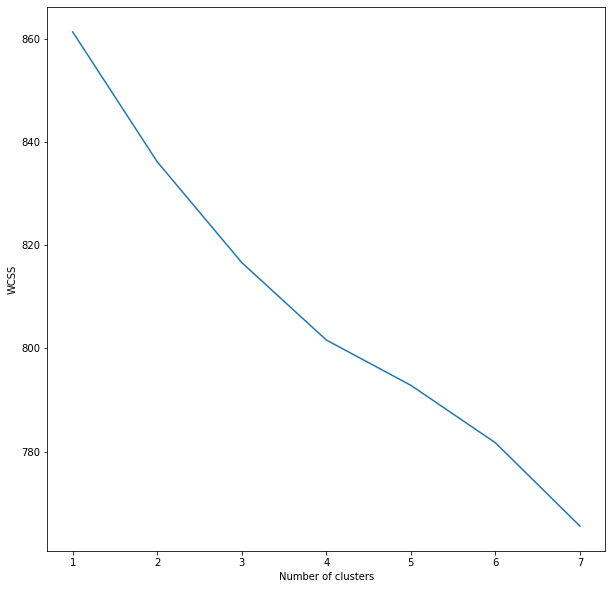

In [19]:
wcss = []
for i in range(1,8):
    model_Ilbo = KMeans(n_clusters = i, init = "k-means++")
    model_Ilbo.fit(WordFeatures)
    wcss.append(model_Ilbo.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,8), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### op1-a

In [20]:

num_clusters = 4
km = KMeans(n_clusters=num_clusters,init = "k-means++")
km.fit(WordFeatures)
centers = np.array(km.cluster_centers_)

print(centers)


[[0.         0.         0.00406481 ... 0.05198077 0.00162342 0.        ]
 [0.         0.01000085 0.         ... 0.0206087  0.00518947 0.00265894]
 [0.00446929 0.00635968 0.00241204 ... 0.05996065 0.01586754 0.00171185]
 [0.00549209 0.01850164 0.01179781 ... 0.01472014 0.0122135  0.00404139]]


/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
data['km_labels'] = km.labels_.tolist()

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
from sklearn.decomposition import PCA
pca = PCA(2)
data_4 = pca.fit_transform(WordFeatures.toarray())
data_4

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[ 0.08913089,  0.15688706],
       [-0.10425841, -0.02314817],
       [-0.15954962,  0.00945079],
       ...,
       [ 0.05735539, -0.2092976 ],
       [-0.22039157, -0.09128301],
       [-0.01379843,  0.18255302]])

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


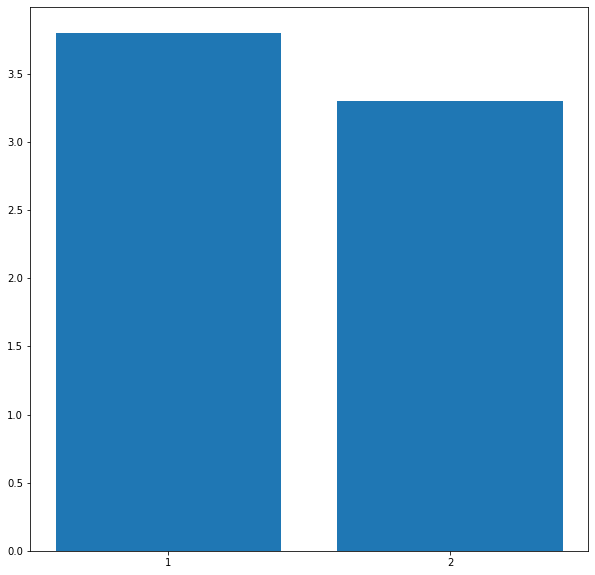

In [23]:
import numpy as np
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


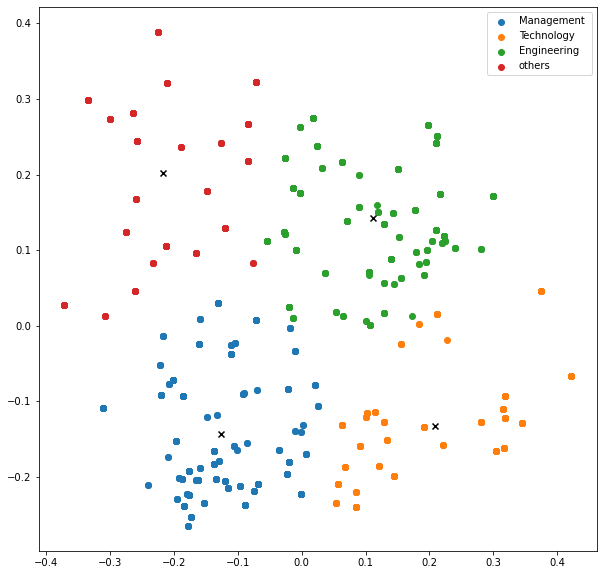

In [25]:

centers = np.array(km.cluster_centers_)
label = km.fit_predict(data_4)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
 
    
    plt.scatter(data_4[label == i , 0] , data_4[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend(('Management ','Technology ','Engineering','others'))
plt.show()

In [25]:
data

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Resume,Category_N,km_labels
0,skills programming languages python pandas num...,1.0,3
1,education details may to may be uitrgpv data s...,1.0,0
2,areas of interest deep learning control system...,1.0,0
3,skills r python sap hana tableau sap hana sql ...,1.0,3
4,education details mca ymcaust faridabad haryan...,1.0,2
...,...,...,...
957,computer skills proficient in ms office word b...,1.0,3
958,willingness to a ept the challenges positive ...,1.0,3
959,personal skills quick learner eagerness to lea...,1.0,3
960,computer skills software knowledge mspower poi...,1.0,0


In [26]:
data['km_labels'] = km.labels_.tolist()

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
data

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Resume,Category_N,km_labels
0,skills programming languages python pandas num...,1.0,0
1,education details may to may be uitrgpv data s...,1.0,3
2,areas of interest deep learning control system...,1.0,3
3,skills r python sap hana tableau sap hana sql ...,1.0,0
4,education details mca ymcaust faridabad haryan...,1.0,2
...,...,...,...
957,computer skills proficient in ms office word b...,1.0,3
958,willingness to a ept the challenges positive ...,1.0,1
959,personal skills quick learner eagerness to lea...,1.0,1
960,computer skills software knowledge mspower poi...,1.0,3


# Op1-b

### 25 clustrs 

In [28]:
Kmean_df=correx.copy()
Kmean_df

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Category,Resume,Category_N
0,Data Science,skills programming languages python pandas num...,1.0
1,Data Science,education details may to may be uitrgpv data s...,1.0
2,Data Science,areas of interest deep learning control system...,1.0
3,Data Science,skills r python sap hana tableau sap hana sql ...,1.0
4,Data Science,education details mca ymcaust faridabad haryan...,1.0
...,...,...,...
957,Testing,computer skills proficient in ms office word b...,1.0
958,Testing,willingness to a ept the challenges positive ...,1.0
959,Testing,personal skills quick learner eagerness to lea...,1.0
960,Testing,computer skills software knowledge mspower poi...,1.0


In [29]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
Kmean_df["Category_25N"] = labelencoder.fit_transform(Kmean_df["Category"])


Kmean_df.tail()

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Category,Resume,Category_N,Category_25N
957,Testing,computer skills proficient in ms office word b...,1.0,23
958,Testing,willingness to a ept the challenges positive ...,1.0,23
959,Testing,personal skills quick learner eagerness to lea...,1.0,23
960,Testing,computer skills software knowledge mspower poi...,1.0,23
961,Testing,skill set os windows xp database mysql sql ser...,1.0,23


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText_25 = Kmean_df['Resume'].values
requiredTarget_25 = Kmean_df['Category_25N'].values

word_vectorizer_25 = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText_25)
WordFeatures_25 = word_vectorizer.transform(requiredText_25)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures_25,requiredTarget_25,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test)

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Feature completed .....
(769, 1500)
  (0, 1497)	0.10892148840895909
  (0, 1493)	0.08158886663333037
  (0, 1492)	0.07933013492688847
  (0, 1486)	0.07189932088477773
  (0, 1483)	0.07177585971296374
  (0, 1475)	0.08065396082854988
  (0, 1474)	0.06257671726827482
  (0, 1472)	0.1313992516609649
  (0, 1458)	0.0870769249553586
  (0, 1457)	0.12661359503078012
  (0, 1456)	0.07053571813542757
  (0, 1452)	0.040890918407201604
  (0, 1443)	0.0938505729294816
  (0, 1440)	0.105125146815018
  (0, 1428)	0.11719595652884428
  (0, 1423)	0.09804658316958786
  (0, 1390)	0.056658962869836904
  (0, 1387)	0.06151541494565951
  (0, 1371)	0.07358503085442986
  (0, 1370)	0.08111584828951066
  (0, 1369)	0.05087797289277284
  (0, 1364)	0.08526370028985075
  (0, 1363)	0.08469469490197089
  (0, 1359)	0.04194218785896434
  (0, 1357)	0.0364866938718771
  :	:
  (192, 485)	0.07761712074811196
  (192, 476)	0.07014988338324384
  (192, 451)	0.09859228611681531
  (192, 435)	0.0895603122652265
  (192, 432)	0.0439746637943317

In [31]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

num_clusters = 25
km_25 = KMeans(n_clusters=num_clusters)
km_25.fit(WordFeatures_25)
centers_25 = np.array(km_25.cluster_centers_)

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
from sklearn.decomposition import PCA
pca_25 = PCA(4)
data_25 = pca_25.fit_transform(WordFeatures_25.toarray())
data_25

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[ 0.0891961 ,  0.15699919, -0.01402918,  0.06557062],
       [-0.10410326, -0.02292634, -0.05870087,  0.08084625],
       [-0.15942772,  0.00957637, -0.08466119, -0.0182293 ],
       ...,
       [ 0.05721096, -0.20941161, -0.04358862, -0.2408033 ],
       [-0.22034963, -0.09152901, -0.06727694, -0.26046452],
       [-0.01392365,  0.18277495,  0.06244849, -0.23310956]])

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


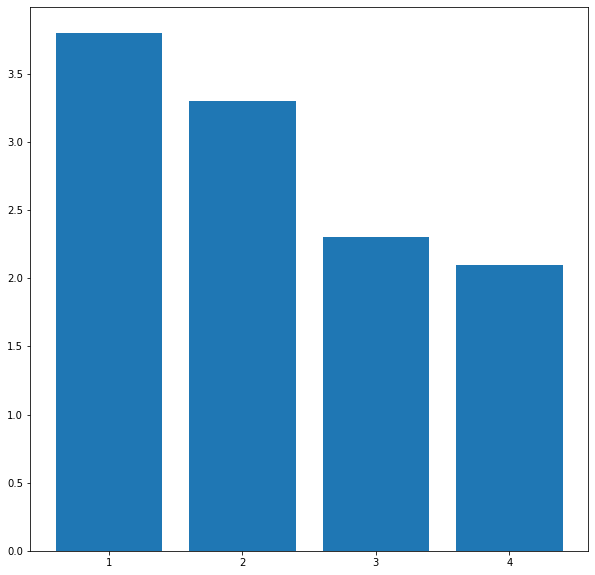

In [33]:
import numpy as np
plt.figure(figsize=(10,10))
var_25 = np.round(pca_25.explained_variance_ratio_*100, decimals = 1)
lbls_25 = [str(x) for x in range(1,len(var_25)+1)]
plt.bar(x=range(1,len(var_25)+1), height = var_25, tick_label = lbls_25)
plt.show()

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


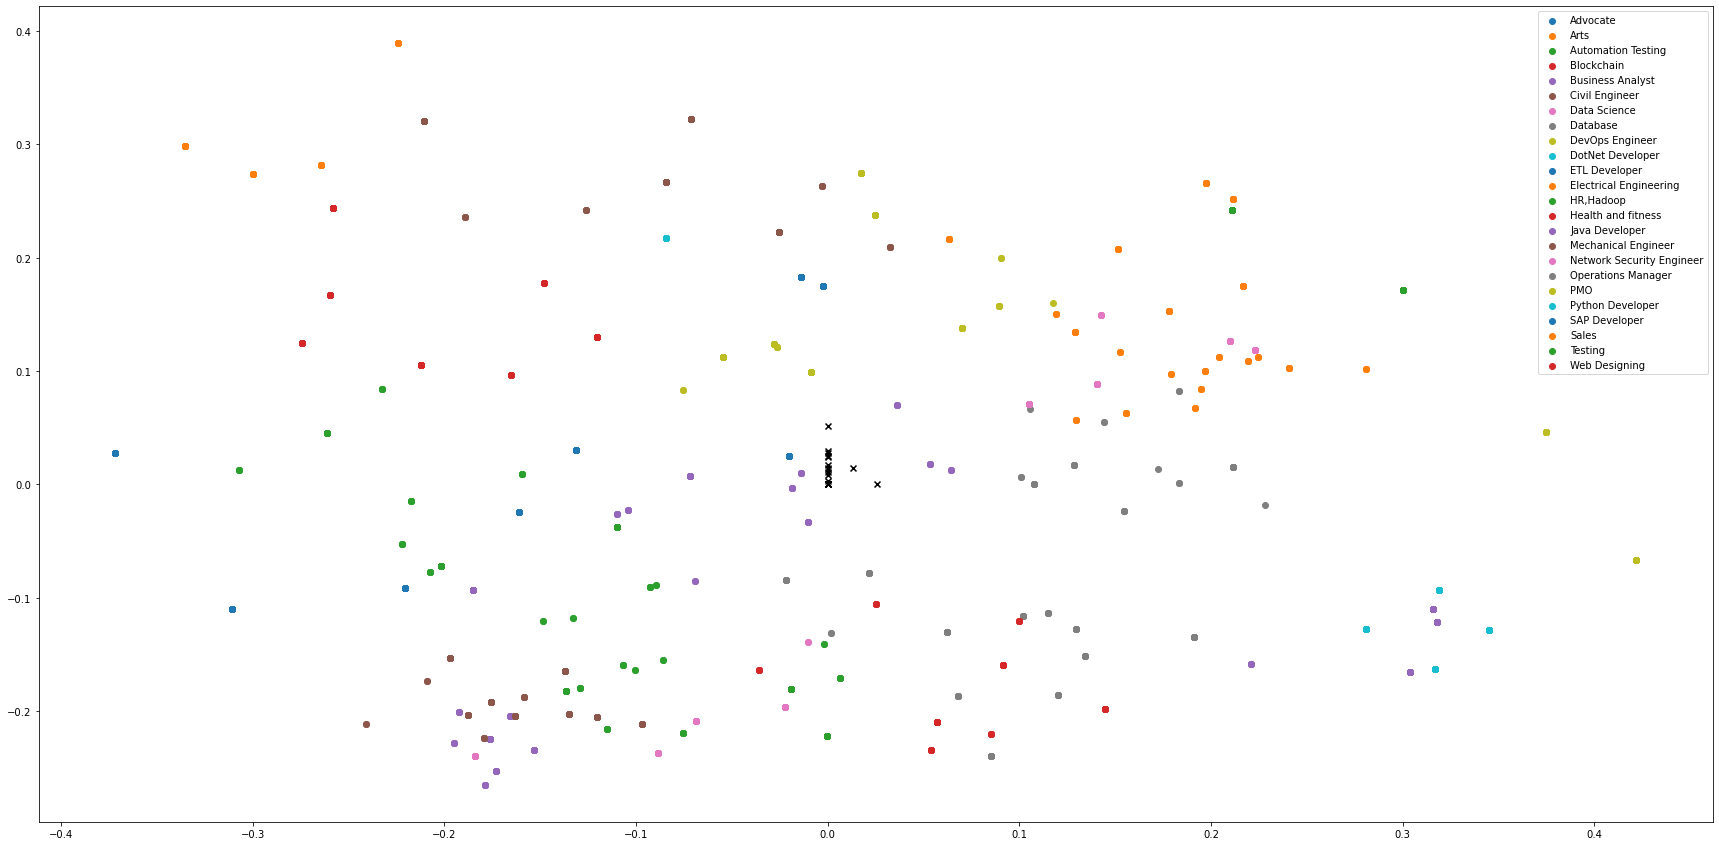

In [34]:
centers_25 = np.array(km_25.cluster_centers_)
label = km_25.fit_predict(data_25)
plt.figure(figsize=(30,15))
uniq_25 = np.unique(label)
for i in uniq_25:
    


    plt.scatter(data_25[label == i , 0] , data_25[label == i , 1] , label = i)
plt.scatter(centers_25[:,0], centers_25[:,1], marker="x", color='k')

#This is done to find the centroid for each clusters.
plt.legend( ('Advocate','Arts','Automation Testing','Blockchain','Business Analyst','Civil Engineer','Data Science','Database','DevOps Engineer','DotNet Developer',
'ETL Developer','Electrical Engineering','HR,Hadoop','Health and fitness','Java Developer','Mechanical Engineer','Network Security Engineer','Operations Manager',
'PMO','Python Developer','SAP Developer','Sales','Testing','Web Designing'),loc='upper right')
plt.show()



In [35]:
Kmean_df['km_labels'] = km.labels_.tolist()

Kmean_df

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Category,Resume,Category_N,Category_25N,km_labels
0,Data Science,skills programming languages python pandas num...,1.0,6,0
1,Data Science,education details may to may be uitrgpv data s...,1.0,6,3
2,Data Science,areas of interest deep learning control system...,1.0,6,3
3,Data Science,skills r python sap hana tableau sap hana sql ...,1.0,6,0
4,Data Science,education details mca ymcaust faridabad haryan...,1.0,6,2
...,...,...,...,...,...
957,Testing,computer skills proficient in ms office word b...,1.0,23,3
958,Testing,willingness to a ept the challenges positive ...,1.0,23,1
959,Testing,personal skills quick learner eagerness to lea...,1.0,23,1
960,Testing,computer skills software knowledge mspower poi...,1.0,23,3


In [36]:
Kmean_df

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Category,Resume,Category_N,Category_25N,km_labels
0,Data Science,skills programming languages python pandas num...,1.0,6,0
1,Data Science,education details may to may be uitrgpv data s...,1.0,6,3
2,Data Science,areas of interest deep learning control system...,1.0,6,3
3,Data Science,skills r python sap hana tableau sap hana sql ...,1.0,6,0
4,Data Science,education details mca ymcaust faridabad haryan...,1.0,6,2
...,...,...,...,...,...
957,Testing,computer skills proficient in ms office word b...,1.0,23,3
958,Testing,willingness to a ept the challenges positive ...,1.0,23,1
959,Testing,personal skills quick learner eagerness to lea...,1.0,23,1
960,Testing,computer skills software knowledge mspower poi...,1.0,23,3


# Corex

In [37]:
import pandas as pd
import numpy as np
import scipy.sparse as ss

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import datasets

from corextopic import corextopic as ct
from corextopic import vis_topic as vt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
vectorizer = CountVectorizer(max_features=20000,
                             stop_words='english', token_pattern="\\b[a-z][a-z]+\\b",
                             binary=True)

doc_word = vectorizer.fit_transform(correx.Resume)
words = list(np.asarray(vectorizer.get_feature_names()))

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Op2-a

- 4 clusters

In [39]:
topic_model = ct.Corex(n_hidden=4, words=words,
                       max_iter=200, verbose=False, seed=1)

topic_model.fit(doc_word, words=words, docs=correx.Resume, 
                anchors=[
                    
                    
                    ['management','project','report','responsible','business','resource','risk','monitor' 
    ,'documentation', 'managers','manage' ,'service', 'ms','plan','customers','activity','handling',
    'support','legal','law','advocate','court','courts','cases','criminal','drafting','litigation','trials',
    'clients','analysis','excel','uat','hr','payroll','mba','compliance','salary','dynamics','education'],
                    
                    [ 'application','web','html' ,'css','bootstrap','software','developed','jquery','technologies',
    'ui','website','photoshop','php','database','javascript','ajax','systems','graphics','sql','synopsis',
    'designer','java','testing','test','windows','android','assembly','sap','data','abap','python','mysql',
    'django','movexm','api','C','network','security','cisco','firewall','server','switchs','lan', 'routers', 
    'dhcp','vpn','backup','windows','automation','system','integration','selenium','regression','scripts',
    'bugs', 'blockchain','portal','bitcoin','analytics','learning','deep','tableau','nlp','neural','algorithms','shell',
    'devops','cloud','aws','linux','git','aspnet','mvc','visual','hadoop','json'],
                         
                         
                         
                         ['engineering','mechanical','machine','process','manufacturing','quotations','industrial','field',
    'civil','site','autocad','construction','inspection','drawings','quality','material',
    'building','villas','electrical','power'], 
                         ['sales','marketing','targets','clients','business','arts','music','events','workshop',
    'media','painting','partners','fitness','gym','nutrition','spa']], anchor_strength=2)

# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))
    
    

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0: plan,documentation,responsible,business,management,support,resource,reports,report,analysis
1: application,mysql,systems,database,html,server,css,sql,website,developed
2: material,process,quality,inspection,manufacturing,schedule,preparing,planning,assist,internal
3: sales,clients,business,marketing,managing,providing,team,required,media,vendors


In [40]:
correx['Coreex_labels'] =topic_model.labels.tolist()
correx

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Category,Resume,Category_N,Coreex_labels
0,Data Science,skills programming languages python pandas num...,1.0,"[False, True, False, True]"
1,Data Science,education details may to may be uitrgpv data s...,1.0,"[False, False, False, False]"
2,Data Science,areas of interest deep learning control system...,1.0,"[False, False, False, False]"
3,Data Science,skills r python sap hana tableau sap hana sql ...,1.0,"[True, True, True, True]"
4,Data Science,education details mca ymcaust faridabad haryan...,1.0,"[False, False, False, False]"
...,...,...,...,...
957,Testing,computer skills proficient in ms office word b...,1.0,"[False, False, False, False]"
958,Testing,willingness to a ept the challenges positive ...,1.0,"[False, False, False, False]"
959,Testing,personal skills quick learner eagerness to lea...,1.0,"[False, False, True, False]"
960,Testing,computer skills software knowledge mspower poi...,1.0,"[False, False, False, False]"


In [41]:
correx['Coreex_labels'] =topic_model.labels
correx

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Category,Resume,Category_N,Coreex_labels
0,Data Science,skills programming languages python pandas num...,1.0,False
1,Data Science,education details may to may be uitrgpv data s...,1.0,False
2,Data Science,areas of interest deep learning control system...,1.0,False
3,Data Science,skills r python sap hana tableau sap hana sql ...,1.0,True
4,Data Science,education details mca ymcaust faridabad haryan...,1.0,False
...,...,...,...,...
957,Testing,computer skills proficient in ms office word b...,1.0,False
958,Testing,willingness to a ept the challenges positive ...,1.0,False
959,Testing,personal skills quick learner eagerness to lea...,1.0,False
960,Testing,computer skills software knowledge mspower poi...,1.0,False


In [42]:
correx['Coreex_labels'].value_counts(ascending=True)

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


True     220
False    742
Name: Coreex_labels, dtype: int64

# op2 -b

- 25 category 

In [43]:
correx_25=correx.copy()

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
correx_25["Category_25N"] = labelencoder.fit_transform(correx_25["Category"])


correx_25.tail()

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Category,Resume,Category_N,Coreex_labels,Category_25N
957,Testing,computer skills proficient in ms office word b...,1.0,False,23
958,Testing,willingness to a ept the challenges positive ...,1.0,False,23
959,Testing,personal skills quick learner eagerness to lea...,1.0,False,23
960,Testing,computer skills software knowledge mspower poi...,1.0,False,23
961,Testing,skill set os windows xp database mysql sql ser...,1.0,False,23


In [45]:
vectorizer25 = CountVectorizer(max_features=20000,
                             stop_words='english', token_pattern="\\b[a-z][a-z]+\\b",
                             binary=True)

doc_word25 = vectorizer.fit_transform(correx_25.Resume)
words25 = list(np.asarray(vectorizer.get_feature_names()))

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [46]:
topic_model = ct.Corex(n_hidden=25, words=words,
                       max_iter=200, verbose=False, seed=1)

topic_model.fit(doc_word, words=words, docs=correx_25.Resume, 
                anchors=[ 
                    
                    ['details','legal' ,'law','advocate' ,'court', 'courts', 'cases', 'criminal', 'matters', 'drafting' ,'litigation', 'trials' ,'clients'],
                    [ 'company' ,'arts','music' ,'development', 'events' ,'responsibilities', 'managing','experience', 'management', 'workshop' ,'media' ,'programme' ,'board' ,'business' ,'commerce', 'science', 'gm', 'painting', 'partners'],
                    ['automation'],
                    [ 'blockchain' ,'description' ,'system','technology' ,'smart' ,'computer' ,'mysql', 'java', 'worked', 'management' ,'build' ,'project', 'web' ,'c', 'developer', 'engineering' ,'javascript', 'portal', 'skills' ,'solidity'],
                    ['business'],
                    ['civil' ,'material','autocad' ],
                    ['data', 'learning','python','year','science','analysis' ,'deep','nlp','neural'],
                    ['sql','server','oracle','backup','installation','servers','windows','monitoring','backups','linux'],
                    ['shell','devops','servers','build','cloud','support','scripting','product','git'],
                    ['net','aspnet','database','sql','jquery','role','javascript','framework','web','visual','comments'],
                    ['sql','talend','mappings','unix','server','environment','company'],
                    ['electrical','power','technical','layout','control','panel','installation','machine','schedules'],
                    ['hr','ounting','education'],
                    ['hadoop','hive','spark','involved','pig','tables','database','various','ecosystem'],
                    ['fitness','health','gym','nutrition','hotel','club','duties','care','therapies','activities'],
                    ['java','developer'],
                    ['engineering','mechanical','technical','machine','process','manufacturing','engineer industrial','support','product','field'],
                    ['network','security','cisco','configuration','firewall','server','switches','devices','technologies','client','troubleshoot','vpn'],
                    ['team','operations' ,'project'],
                    ['management','report','responsible','business','reports'],
                    ['python','developer','computer','development','django','mysql','technical'],
                    ['sap','project','data','business','developer','application','views','implemented','abap'],
                    ['sales','marketing','targets','clients','leads','reports','meeting','pvt','sql'],
                    ['testing','test','check','tests'],
                    ['web','html' ,'css','bootstrap','software'],


                ], anchor_strength=2)




# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))
    
    

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0: cases,clients,opportunities,executing,overall,drafting,determine,legal,ordance,tenure
1: development,management,business,managing,processes,responsibilities,requirements,related,multiple,experience
2: automation,release,offshore,communicate,regarding,scenarios,collaboration,simultaneously,coordinating,include
3: technology,web,mysql,project,build,worked,java,developer,services,make
4: business,effective,performance,key,closely,functional,areas,bank,employee,scope
5: material,autocad,delivery,monthly,preparation,actual,assist,consultants,review,audits
6: data,analysis,python,learning,systems,insurance,deep,shared,implementation,sdlc
7: backup,servers,oracle,server,sql,linux,windows,monitoring,users,migration
8: support,shell,servers,product,scripting,git,base,enterprise,sent,file
9: database,jquery,framework,javascript,sql,web,role,based,usa,methodology
10: environment,sql,server,db,integration,onsite,mappings,unix,version,change
11: schedules,control,power,progress,technical,problem

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


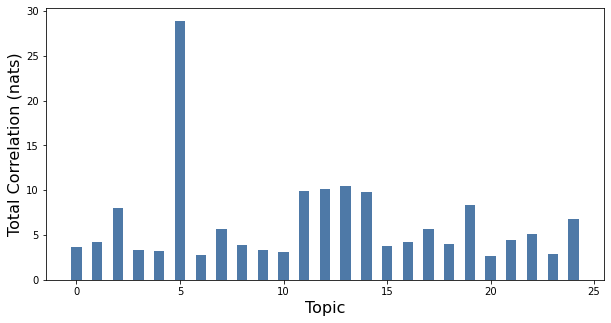

In [47]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

In [48]:
correx_25

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Category,Resume,Category_N,Coreex_labels,Category_25N
0,Data Science,skills programming languages python pandas num...,1.0,False,6
1,Data Science,education details may to may be uitrgpv data s...,1.0,False,6
2,Data Science,areas of interest deep learning control system...,1.0,False,6
3,Data Science,skills r python sap hana tableau sap hana sql ...,1.0,True,6
4,Data Science,education details mca ymcaust faridabad haryan...,1.0,False,6
...,...,...,...,...,...
957,Testing,computer skills proficient in ms office word b...,1.0,False,23
958,Testing,willingness to a ept the challenges positive ...,1.0,False,23
959,Testing,personal skills quick learner eagerness to lea...,1.0,False,23
960,Testing,computer skills software knowledge mspower poi...,1.0,False,23


In [49]:
correx_25['correx_25_labels'] =topic_model.labels.tolist()
correx_25

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Category,Resume,Category_N,Coreex_labels,Category_25N,correx_25_labels
0,Data Science,skills programming languages python pandas num...,1.0,False,6,"[False, False, False, True, False, True, True,..."
1,Data Science,education details may to may be uitrgpv data s...,1.0,False,6,"[False, False, False, False, True, False, True..."
2,Data Science,areas of interest deep learning control system...,1.0,False,6,"[False, False, False, True, True, False, True,..."
3,Data Science,skills r python sap hana tableau sap hana sql ...,1.0,True,6,"[False, True, True, True, True, False, True, T..."
4,Data Science,education details mca ymcaust faridabad haryan...,1.0,False,6,"[False, False, False, False, False, False, Tru..."
...,...,...,...,...,...,...
957,Testing,computer skills proficient in ms office word b...,1.0,False,23,"[False, False, False, False, False, False, Fal..."
958,Testing,willingness to a ept the challenges positive ...,1.0,False,23,"[False, False, False, False, False, False, Fal..."
959,Testing,personal skills quick learner eagerness to lea...,1.0,False,23,"[False, False, False, False, False, False, Fal..."
960,Testing,computer skills software knowledge mspower poi...,1.0,False,23,"[False, False, False, False, False, False, Fal..."


In [50]:
correx_25['correx_25_labels'] =topic_model.labels

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
correx_25['correx_25_labels'].value_counts(ascending=True)


/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


True     221
False    741
Name: correx_25_labels, dtype: int64

In [52]:
correx_25

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Category,Resume,Category_N,Coreex_labels,Category_25N,correx_25_labels
0,Data Science,skills programming languages python pandas num...,1.0,False,6,False
1,Data Science,education details may to may be uitrgpv data s...,1.0,False,6,False
2,Data Science,areas of interest deep learning control system...,1.0,False,6,False
3,Data Science,skills r python sap hana tableau sap hana sql ...,1.0,True,6,False
4,Data Science,education details mca ymcaust faridabad haryan...,1.0,False,6,False
...,...,...,...,...,...,...
957,Testing,computer skills proficient in ms office word b...,1.0,False,23,False
958,Testing,willingness to a ept the challenges positive ...,1.0,False,23,False
959,Testing,personal skills quick learner eagerness to lea...,1.0,False,23,False
960,Testing,computer skills software knowledge mspower poi...,1.0,False,23,False
